# PCA - Tarefa 01: *HAR* com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [1]:
%matplotlib inline
import pandas as pd

from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

import time

filename_features = "UCI HAR Dataset/features.txt"
filename_labels = "UCI HAR Dataset/activity_labels.txt"

filename_subtrain = "UCI HAR Dataset/train/subject_train.txt"
filename_xtrain = "UCI HAR Dataset/train/X_train.txt"
filename_ytrain = "UCI HAR Dataset/train/y_train.txt"

filename_subtest = "UCI HAR Dataset/test/subject_test.txt"
filename_xtest = "UCI HAR Dataset/test/X_test.txt"
filename_ytest = "UCI HAR Dataset/test/y_test.txt"

features = pd.read_csv(filename_features, header=None, names=['nome_var'], sep="#")
labels = pd.read_csv(filename_labels, sep=r'\s+', header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'])
X_train = pd.read_csv(filename_xtrain, sep=r'\s+', header=None, names=features['nome_var'].tolist())
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'])
X_test = pd.read_csv(filename_xtest, sep=r'\s+', header=None, names=features['nome_var'].tolist())
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])

## Árvore de decisão

Rode uma árvore de decisão com todas as variáveis, utilizando o ```ccp_alpha=0.001```. Avalie a acurácia nas bases de treinamento e teste. Avalie o tempo de processamento.

In [2]:
%%time
# Construindo a árvore
tree = DecisionTreeClassifier(random_state=2360873, min_samples_leaf = 20, ccp_alpha = 0.001).fit(X_train, y_train)

# Treino 
tr_sc = tree.score(X_train, y_train)

# Cálculo de acurácia
tt_sc = tree.score(X_test, y_test)

print(f'Acurácia na base de treino:    {tr_sc*100:.1f}')
print(f'Acurácia na base de teste:     {tt_sc*100:.1f}')

Acurácia na base de treino:    95.8
Acurácia na base de teste:     86.9
CPU times: total: 7.41 s
Wall time: 7.48 s


A árvore estudada apresenta uma alta acurácia com valores e o tempo de resposta alta se comparado a estudos com menor quantidade de colunas, aproximadamente, 8 segundos. 

## Árvore com PCA

Faça uma análise de componemtes principais das variáveis originais. Utilize apenas uma componente. Faça uma árvore de decisão com esta componente como variável explicativa.

- Avalie a acurácia nas bases de treinamento e teste
- Avalie o tempo de processamento

In [3]:
# Análise de PCA
pca = PCA(n_components = 1).fit(X_train)

pca_tr = pca.transform(X_train)
pca_tt = pca.transform(X_test)

print("Formato do novo treino: ", pca_tr.shape)
print("Formato do novo teste: ", pca_tt.shape)

Formato do novo treino:  (7352, 1)
Formato do novo teste:  (2947, 1)


In [4]:
%%time
# Construindo a árvore
tree2 = DecisionTreeClassifier(random_state=2360873, min_samples_leaf = 20, ccp_alpha = 0.001).fit(pca_tr, y_train)

# Treino 
tr_sc2 = tree2.score(pca_tr, y_train)

# Cálculo de acurácia
tt_sc2 = tree2.score(pca_tt, y_test)

print(f'Acurácia no PCA de treino:    {tr_sc2*100:.1f}')
print(f'Acurácia no PCA de teste:     {tt_sc2*100:.1f}')

Acurácia no PCA de treino:    50.0
Acurácia no PCA de teste:     45.7
CPU times: total: 78.1 ms
Wall time: 56.3 ms


Houve uma grande redução de todas as variáveis calculadas. Uma redução em mais de 40 pontos de porcentagem da acurácia em ambas as bases. Também, houve uma redução em aproximadamente 100%.

## Testando o número de componentes

Com base no código acima, teste a árvore de classificação com pelo menos as seguintes possibilidades de quantidades de componentes: ```[1, 2, 5, 10, 50]```. Avalie para cada uma delas:

- Acurácia nas bases de treino e teste
- Tempo de processamento


In [8]:
def graficos(acc_tr, acc_tt, tm, comp):
    
    sorted_data = sorted(zip(comp, acc_tr, acc_tt, tm), key=lambda x: x[0])
    comp, acc_tr, acc_tt, tm = zip(*sorted_data)
    
    fig, ax = plt.subplots(3, 1, figsize=[12, 18])
    x_positions = range(len(comp))  
    bar_width = 0.8 

    # Gráfico 1: Acurácia na base de treino
    bars_tr = ax[1].bar(x_positions, acc_tr, width=bar_width, color='lightgreen')
    ax[1].set(xlabel='Componentes', ylabel='Acurácia (%)', title='Número de Componentes x Acurácia na Base de Treino')
    ax[1].set_xticks(x_positions)
    ax[1].set_xticklabels(comp)
    ax[1].bar_label(bars_tr, label_type='edge', fmt='%.1f%%', padding=3)
    ax[1].grid(True, axis='y')
    
    # Gráfico 2: Acurácia na base de teste
    bars_tt = ax[0].bar(x_positions, acc_tt, width=bar_width, color='c')
    ax[0].set(xlabel='Componentes', ylabel='Acurácia (%)', title='Número de Componentes x Acurácia na Base de Teste')
    ax[0].set_xticks(x_positions)  
    ax[0].set_xticklabels(comp)   
    ax[0].bar_label(bars_tt, label_type='edge', fmt='%.1f%%', padding=3)
    ax[0].grid(True, axis='y')
    
    # Gráfico 3: Tempo de desenvolvimento
    bars_tm = ax[2].bar(x_positions, tm, width=bar_width, color='salmon')
    ax[2].set(xlabel='Componentes', ylabel='Tempo (s)', title='Número de Componentes x Tempo de Desenvolvimento (em s)')
    ax[2].set_xticks(x_positions)
    ax[2].set_xticklabels(comp)
    ax[2].bar_label(bars_tm, label_type='edge', fmt='%.2f s', padding=3)
    ax[2].grid(True, axis='y')
    
    plt.tight_layout()
    plt.show()

In [9]:
def pca_comp(X_train, y_train, X_test, y_test):
    # Iniciando as listas para receber os valores que serão obtidos posteriormente
    times = []
    acc_tt = []
    acc_tr = [] 
    comp_lt = []
    
    while True: 
        #Recebendo o número de componentes de forma interativa
        comp = int(input("Quantos componentes deseja avaliar? Para sair digite 0: "))

        if comp < 1:
            if comp == 0: # Saindo em 0
                print("Saindo da avaliação.")
                break
            else: # Voltando se negativo
                print("Valor menor que 1 é inválido.")
                continue

        start_time = time.time()
        
        # Definição do PCA
        pca = PCA(n_components = comp).fit(X_train)

        print(f"Valores para a análise de {comp} compnentes ")
        pca_tr = pca.transform(X_train)
        pca_tt = pca.transform(X_test)
    
        print("Formato do novo treino: ", pca_tr.shape)
        print("Formato do novo teste: ", pca_tt.shape)
        
        # Construindo a árvore
        tree = DecisionTreeClassifier(random_state=2360873, min_samples_leaf = 20, ccp_alpha = 0.001).fit(pca_tr, y_train)
    
        # Treino 
        tr_sc = tree.score(pca_tr, y_train)
    
        # Cálculo de acurácia
        tt_sc = tree.score(pca_tt, y_test)

        end_time = time.time()
        total_time = end_time - start_time

        acc_tr.append(tr_sc*100)
        acc_tt.append(tt_sc*100)
        times.append(total_time)
        comp_lt.append(comp)
    
        print(f'Acurácia no PCA de treino:    {tr_sc*100:.1f}')
        print(f'Acurácia no PCA de teste:     {tt_sc*100:.1f}')
        print(f'Tempo de processamento:       {total_time:.2f} s')
        print("-"*180)

    if len(comp_lt) > 1:
        graficos(acc_tr, acc_tt, times, comp_lt)
    else:
        print("Nenhum dado para plotar gráficos.")

Quantos componentes deseja avaliar? Para sair digite 0:  1


Valores para a análise de 1 compnentes 
Formato do novo treino:  (7352, 1)
Formato do novo teste:  (2947, 1)
Acurácia no PCA de treino:    50.0
Acurácia no PCA de teste:     45.7
Tempo de processamento:       0.18 s
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Quantos componentes deseja avaliar? Para sair digite 0:  2


Valores para a análise de 2 compnentes 
Formato do novo treino:  (7352, 2)
Formato do novo teste:  (2947, 2)
Acurácia no PCA de treino:    61.3
Acurácia no PCA de teste:     58.5
Tempo de processamento:       0.17 s
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Quantos componentes deseja avaliar? Para sair digite 0:  5


Valores para a análise de 5 compnentes 
Formato do novo treino:  (7352, 5)
Formato do novo teste:  (2947, 5)
Acurácia no PCA de treino:    84.1
Acurácia no PCA de teste:     79.1
Tempo de processamento:       0.23 s
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Quantos componentes deseja avaliar? Para sair digite 0:  10


Valores para a análise de 10 compnentes 
Formato do novo treino:  (7352, 10)
Formato do novo teste:  (2947, 10)
Acurácia no PCA de treino:    88.0
Acurácia no PCA de teste:     81.9
Tempo de processamento:       0.20 s
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Quantos componentes deseja avaliar? Para sair digite 0:  50


Valores para a análise de 50 compnentes 
Formato do novo treino:  (7352, 50)
Formato do novo teste:  (2947, 50)
Acurácia no PCA de treino:    90.6
Acurácia no PCA de teste:     81.3
Tempo de processamento:       0.78 s
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Quantos componentes deseja avaliar? Para sair digite 0:  100


Valores para a análise de 100 compnentes 
Formato do novo treino:  (7352, 100)
Formato do novo teste:  (2947, 100)
Acurácia no PCA de treino:    91.1
Acurácia no PCA de teste:     82.1
Tempo de processamento:       1.81 s
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Quantos componentes deseja avaliar? Para sair digite 0:  200


Valores para a análise de 200 compnentes 
Formato do novo treino:  (7352, 200)
Formato do novo teste:  (2947, 200)
Acurácia no PCA de treino:    91.3
Acurácia no PCA de teste:     82.4
Tempo de processamento:       3.40 s
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Quantos componentes deseja avaliar? Para sair digite 0:  500


Valores para a análise de 500 compnentes 
Formato do novo treino:  (7352, 500)
Formato do novo teste:  (2947, 500)
Acurácia no PCA de treino:    91.4
Acurácia no PCA de teste:     82.0
Tempo de processamento:       9.10 s
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Quantos componentes deseja avaliar? Para sair digite 0:  300


Valores para a análise de 300 compnentes 
Formato do novo treino:  (7352, 300)
Formato do novo teste:  (2947, 300)
Acurácia no PCA de treino:    91.4
Acurácia no PCA de teste:     82.0
Tempo de processamento:       5.15 s
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Quantos componentes deseja avaliar? Para sair digite 0:  250


Valores para a análise de 250 compnentes 
Formato do novo treino:  (7352, 250)
Formato do novo teste:  (2947, 250)
Acurácia no PCA de treino:    91.4
Acurácia no PCA de teste:     82.0
Tempo de processamento:       5.06 s
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Quantos componentes deseja avaliar? Para sair digite 0:  220


Valores para a análise de 220 compnentes 
Formato do novo treino:  (7352, 220)
Formato do novo teste:  (2947, 220)
Acurácia no PCA de treino:    91.4
Acurácia no PCA de teste:     81.9
Tempo de processamento:       4.44 s
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Quantos componentes deseja avaliar? Para sair digite 0:  210


Valores para a análise de 210 compnentes 
Formato do novo treino:  (7352, 210)
Formato do novo teste:  (2947, 210)
Acurácia no PCA de treino:    91.4
Acurácia no PCA de teste:     81.9
Tempo de processamento:       4.27 s
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Quantos componentes deseja avaliar? Para sair digite 0:  205


Valores para a análise de 205 compnentes 
Formato do novo treino:  (7352, 205)
Formato do novo teste:  (2947, 205)
Acurácia no PCA de treino:    91.4
Acurácia no PCA de teste:     82.0
Tempo de processamento:       4.07 s
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Quantos componentes deseja avaliar? Para sair digite 0:  0


Saindo da avaliação.


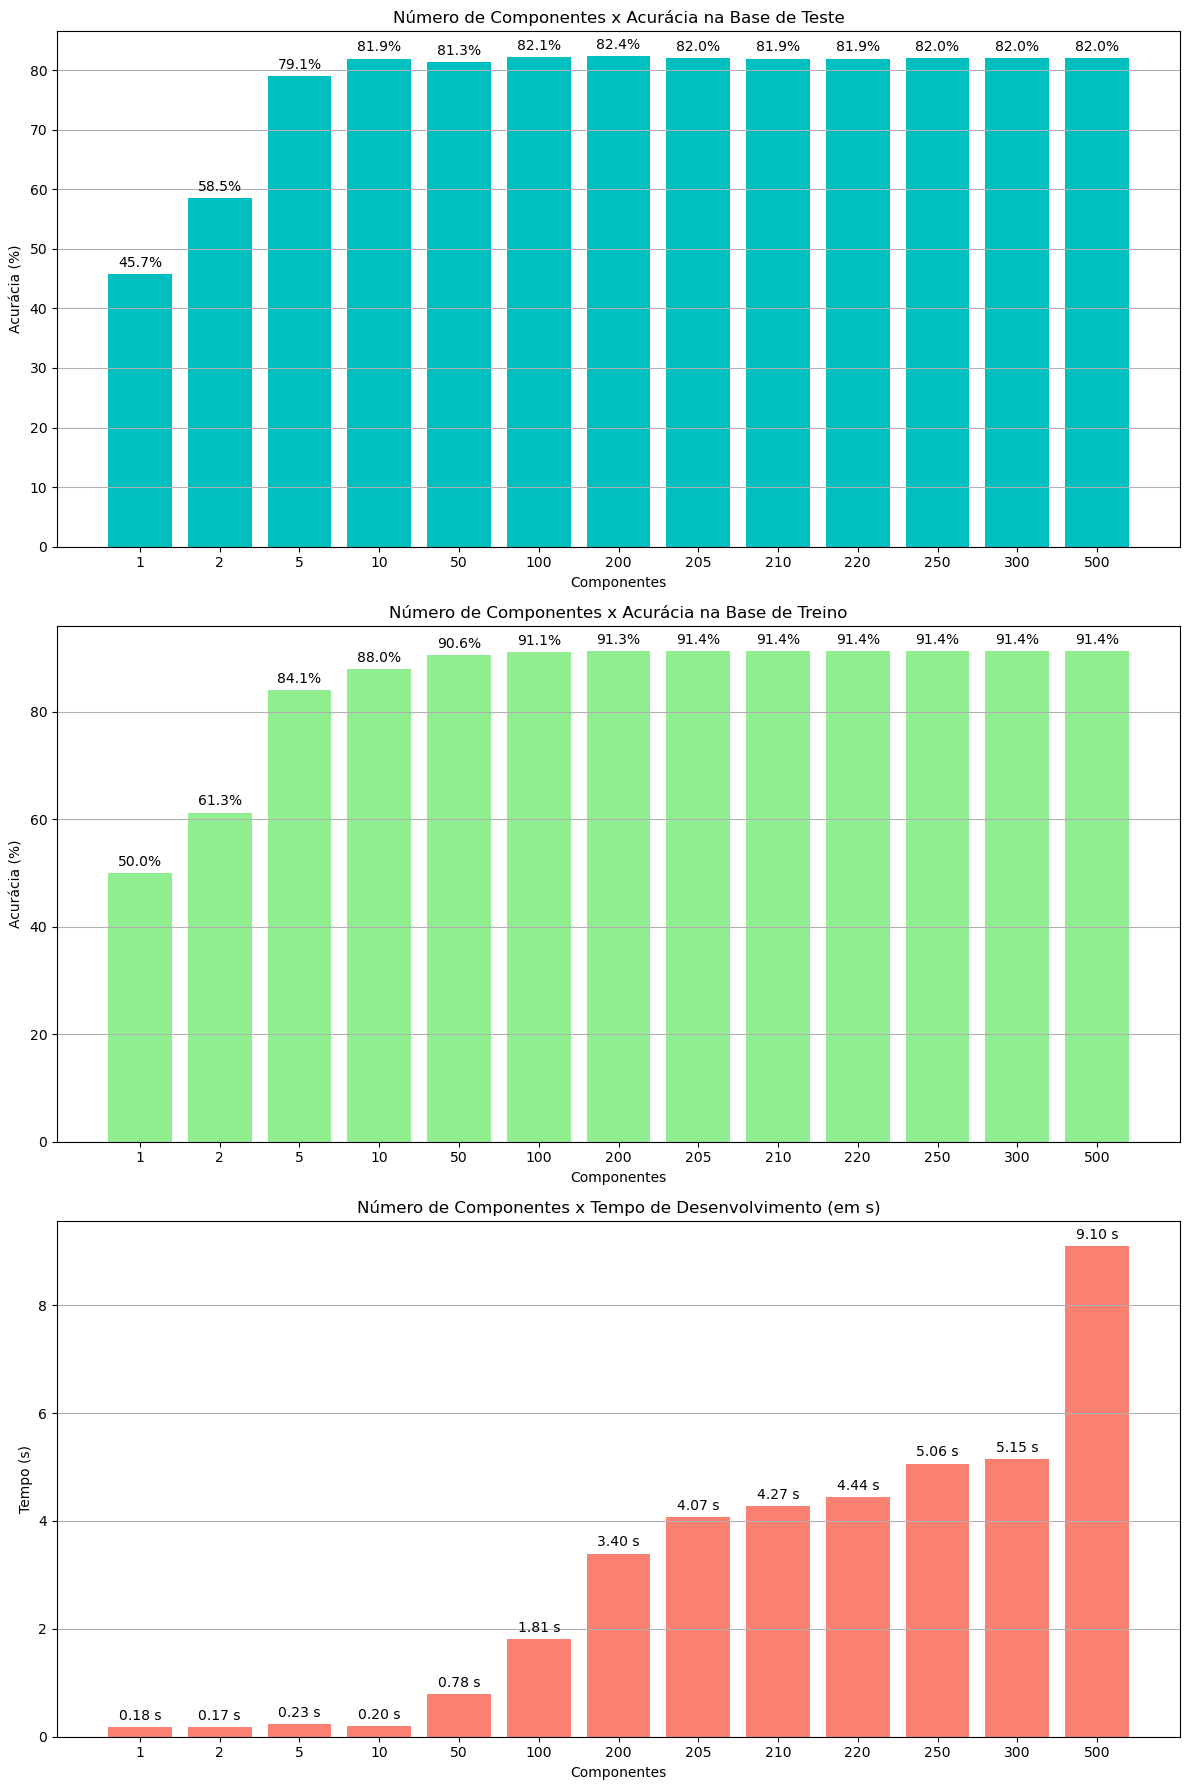

In [10]:
pca_comp(X_train, y_train, X_test, y_test)

## Conclua

- O que aconteceu com a acurácia?
- O que aconteceu com o tempo de processamento?

Em relação aos valores de números de componentes analisados [1, 2, 5, 10, 50, 100, 200, 205, 210, 220, 250, 300, 500] percebemos que há um aumento linear do tempo de desenvolvimento. Enquanto percebemos um aumento da acurácia em relação ao número de componentes até certo valor, chegando a este valor limite entre 200 e 205 componentes. 